In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [0]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/kriyeng/darknet/
#%cd darknet

# Check the folder
#!ls

# I have a branch where I have done the changes commented above
#!git checkout feature/google-colab

#Compile Darknet
#!make

#Copies the Darknet compiled version to Google drive
#!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [0]:
!mkdir darknet
%cd darknet

# Copy the Darkent compiled version to the VM local drive
!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet
%cd ..

/content/darknet
/content


In [0]:
!ls

darknet  gdrive  sample_data


In [0]:
#Ahora tenemos darknet bien instalado y vamos a entrenar la red
#%cd ..
!git clone https://github.com/urtzi98/yoloTrainFiles.git
#%cd darknet

Cloning into 'yoloTrainFiles'...
remote: Enumerating objects: 31005, done.
remote: Counting objects: 100% (31005/31005), done.
remote: Compressing objects: 100% (30998/30998), done.
remote: Total 94233 (delta 50), reused 656 (delta 4), pack-reused 63228
Receiving objects: 100% (94233/94233), 1.67 GiB | 34.45 MiB/s, done.
Resolving deltas: 100% (788/788), done.
Checking out files: 100% (62474/62474), done.


In [0]:
#me los guarda en una lista de forma desordenada por ello para cambiar los txt tengo que mirar su finalidad para modificarlos
from os import scandir, getcwd

def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

lista = ls("yoloTrainFiles/100kTrain")
print(len(lista))

62466


In [0]:
#para cambiar los archivos de preparacion
WINDOWS_LINE_ENDING = b'\r\n'
UNIX_LINE_ENDING = b'\n'
# relative or absolute file path, e.g.:
file_path = r"yoloTrainFiles/bdd100k_training_files/val.txt"

with open(file_path, 'rb') as open_file:
    content = open_file.read()

content = content.replace(WINDOWS_LINE_ENDING, UNIX_LINE_ENDING)
#print(content)

with open(file_path, 'wb') as open_file:
    open_file.write(content)
    print("archivo cambiado")

archivo cambiado


In [0]:
#para que el entrenamiento se de bien tengo que cambiar todos los archivos de la forma clrf a lf por ello aplico esta funcion a todos los archivos txt de labels
# replacement strings
WINDOWS_LINE_ENDING = b'\r\n'
UNIX_LINE_ENDING = b'\n'

i=0
textos=0
while(i<62466):
    l=lista[i].split(".")
    if(l[1]=="txt"):
        # relative or absolute file path, e.g.:
        file_path = r"yoloTrainFiles/100kTrain/"+lista[i]

        with open(file_path, 'rb') as open_file:
            content = open_file.read()

        content = content.replace(WINDOWS_LINE_ENDING, UNIX_LINE_ENDING)

        with open(file_path, 'wb') as open_file:
            open_file.write(content)
            #print("cambiado")
        textos=textos+1
    i=i+1
print(i)
print(textos)

62466
31206


In [0]:
cd darknet

/content/darknet


In [0]:
#train con los chart tengo que entrenarlo con anchor boxes que ya las he obtenido. subd= 16 y data augmentation cambiau los valores distintos
!./darknet detector train "/content/gdrive/My Drive/darknet/bdd100k.data" "/content/gdrive/My Drive/darknet/cfg/yolov3-bdd100k.cfg" "/content/gdrive/My Drive/darknet/backup/3clasesAnchorsSubd16/yolov3-bdd100k_last.weights" -dont_show -mjpeg_port 8090 -map

Streaming output truncated to the last 5000 lines.
Loaded: 0.000042 seconds

 (next mAP calculation at 6228 iterations) 
 5146: 3.716161, 3.797040 avg loss, 0.000100 rate, 10.537796 seconds, 329344 images
 MJPEG-stream sent. 
Loaded: 0.000053 seconds

 (next mAP calculation at 6228 iterations) 
 5147: 3.998160, 3.817152 avg loss, 0.000100 rate, 10.641247 seconds, 329408 images
 MJPEG-stream sent. 
Loaded: 0.000043 seconds

 (next mAP calculation at 6228 iterations) 
 5148: 3.616997, 3.797136 avg loss, 0.000100 rate, 10.615214 seconds, 329472 images
 MJPEG-stream sent. 
Loaded: 0.000043 seconds

 (next mAP calculation at 6228 iterations) 
 5149: 3.610075, 3.778430 avg loss, 0.000100 rate, 10.602836 seconds, 329536 images
 MJPEG-stream sent. 
Loaded: 0.000041 seconds
Corrupt JPEG data: premature end of data segment

 (next mAP calculation at 6228 iterations) 
 5150: 3.454942, 3.746081 avg loss, 0.000100 rate, 10.661208 seconds, 329600 images
 MJPEG-stream sent. 
Resizing
352 x 352 
Corru

In [0]:
#train con los chart en el servidor: http://ip-address:8090 con subdivisions = 32 y heiht = 416 usando conv.74 de yolo y el data augmentation de al tabla 1
%cd darknet
!./darknet detector train "/content/yoloTrainFiles/bdd100k_training_files/bdd100k.data" "/content/yoloTrainFiles/bdd100k_training_files/yolov3-bdd100k.cfg" "/content/gdrive/My Drive/darknet/weights/darknet53.conv.74" -dont_show -mjpeg_port 8090 -map
download("chart.png")

/content/darknet
 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128

NameError: ignored

In [0]:
cd darknet

/content/darknet


Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image data/labels/55_0.png
Cannot load image data/labels/56_0.png
Cannot load image data/la

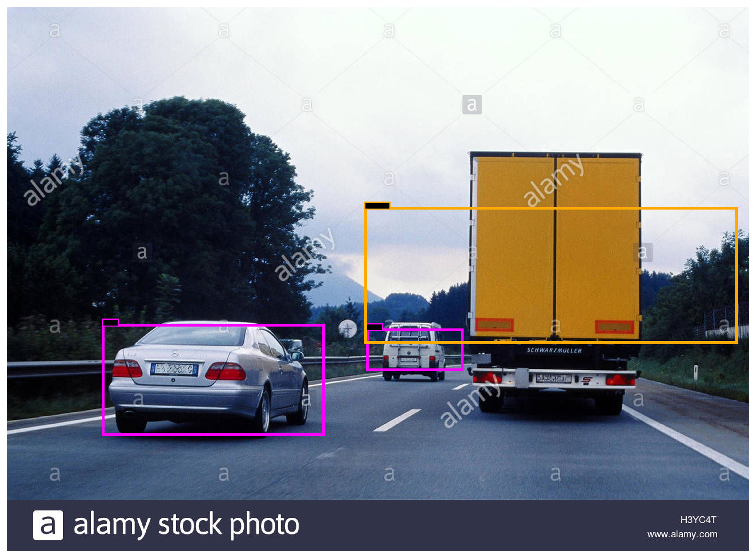

In [0]:
#detección probando nuestros pesos
!./darknet detector test "/content/yoloTrainFiles/bdd100k_training_files/bdd100k.data" "/content/gdrive/My Drive/darknet/cfg/yolov3-bdd100k.cfg" "/content/gdrive/My Drive/darknet/backup/3clasesAnchorsSubd16/yolov3-bdd100k_6000.weights" "/content/gdrive/My Drive/darknet/data/truck_cars.jpg"
imShow("predictions.jpg")

In [0]:
download("predictions.jpg")

In [0]:
cd darknet

/content/darknet


In [0]:
#para sacar medidas
!./darknet detector map "/content/gdrive/My Drive/darknet/bdd100k.data" "/content/gdrive/My Drive/darknet/cfg/yolov3-bdd100k.cfg" "/content/gdrive/My Drive/darknet/backup/3clasesSubd16/yolov3-bdd100k_5000.weights"

In [0]:
#calcular los anchors
!./darknet detector calc_anchors "/content/gdrive/My Drive/darknet/bdd100k.data" -num_of_clusters 9 -width 416 -height 416


 num_of_clusters = 9, width = 416, height = 416 
 read labels from 21260 images 
 loaded 	 image: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 loaded 	 image: 21260 	 box: 226497
 all loaded. 

 calculating k-means++ ...

 iterations = 206 


 avg IoU = 68.46 % 

Saving anchors to the file: anchors.txt 
anchors =   9,  6,  17, 11,  28, 20,  40, 33,  60, 51,  99, 33,  93, 77, 150,102, 225,149



In [0]:
download("anchors.txt")

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def download(path):
  from google.colab import files
  files.download(path)

download("chart.png")

In [0]:
#cada 100 iteraciones se me guarda en backup el archivo de wieghts pero se sobrescribe el anterior, como puedo guardar en un archivo de nombre distinto?
#para parar el entrenamiento lo mejor sería que obtenga entre 0.5-3 en el avg loss
#he probado con subdivision = 16 pero luego quiero probar con subdivision = 32
#Los videos tienen que ser desde dentro del coche para detectar vehiculos
#Tarda mucho tiempo el entrenamiento por ello como mucho podre probar tres veces a entrenar la red con las imagenes que tengo
#     HECHO 1.Entrenamiento uno: el primero que estoy haciendo que es mediante classes = 10 y subdivision = 16. Para que sea un entrenamiento optimo hay que hacer 2000 iteraciones por clases y como tenemos 10 pues 20000 iteraciones (en el 15000 iteraciones avg loss muy bajo)
#     2.Entrenamiento dos: para ahorrar tiempo de entrenamiento voy a borrar las clases, traffic light(0) traffic sign(1) person(3) bus(4) rider(5 pero no se si quitarlo) bike(7) train(9) con esto se me quedan tres clases o cuatro y por ello ejecutare como mucho 8000 iteraciones.
#       para hacer este entrenamiento hay que quitar de cada txt las anotaciones de dichas clases. probaré este entrenamiento con subdivision = 16
#     3.Entrenamiento tres: con los archivos del entrenamiento dos tocaré algun parametro como el subdivision = 32 por probar
#Las imagenes con las que entreno son desde un coche normalmente por ello los videos a procesar deben ser desde un coche dentro